In [1]:
#abrir ViviendasAhomeDic2025Colcode.csv con pandas
import pandas as pd
df = pd.read_csv('ViviendasAhomeDic2025Colcode.csv')
df.head()

,Colonia,Construcción,Terreno,Ant,Recamaras,Baños,Estacionamiento,Precio
0,0.86,209.0,209.0,0,3,3.0,2,"4,850,000"
1,0.08,397.0,166.0,20,7,4.0,2,"4,800,000"
2,0.51,275.0,144.0,5,4,4.0,2,"4,380,000"
3,0.61,105.0,122.0,15,3,1.0,2,"1,980,000"
4,0.32,206.0,126.0,7,3,2.0,3,"3,300,000"


In [2]:
df.shape

(186, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Colonia          186 non-null    float64
 1   Construcción     186 non-null    float64
 2   Terreno          186 non-null    float64
 3   Ant              186 non-null    int64  
 4   Recamaras        186 non-null    int64  
 5   Baños            186 non-null    float64
 6   Estacionamiento  186 non-null    int64  
 7   Precio           186 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 11.8+ KB


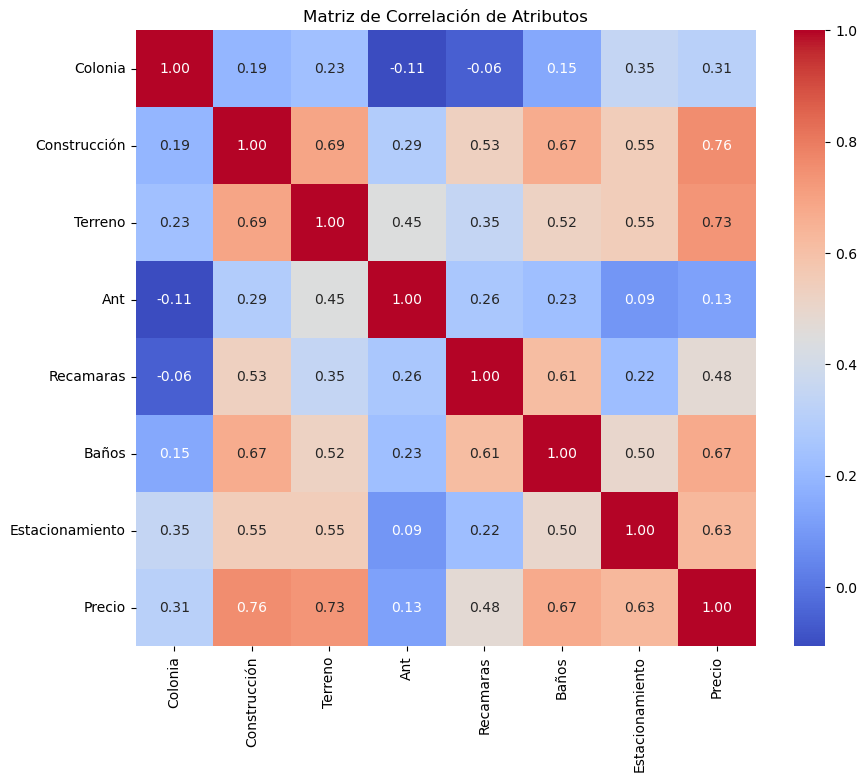

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Check if 'Precio' column needs cleaning and conversion
# Only apply .str accessor if the column is of string/object type
if df['Precio'].dtype == 'object':
    df['Precio'] = df['Precio'].str.replace(',', '', regex=False).astype(float)

# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Atributos')
plt.show()

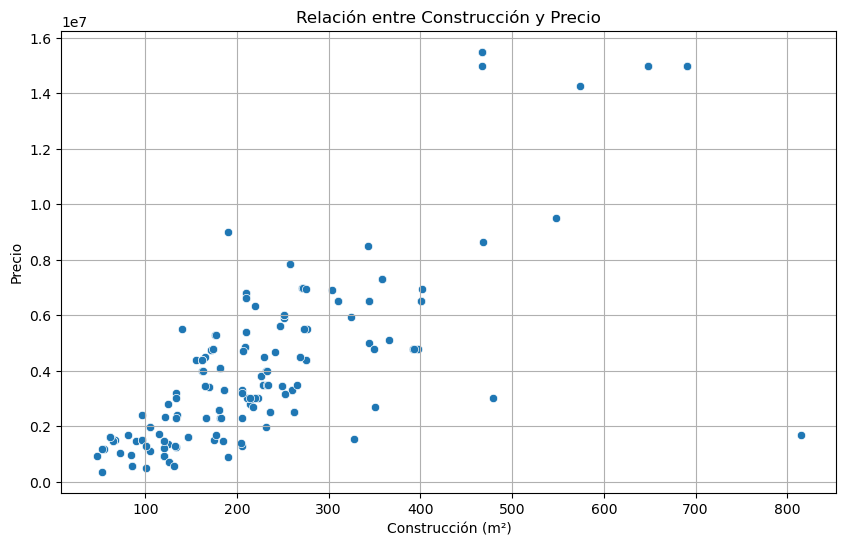

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Construcción vs Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Construcción', y='Precio')
plt.title('Relación entre Construcción y Precio')
plt.xlabel('Construcción (m²)')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

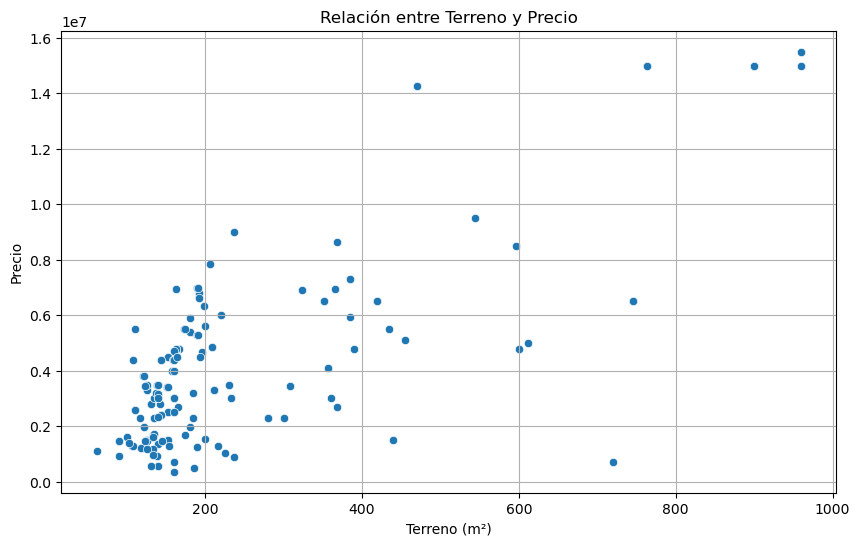

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Terreno vs Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Terreno', y='Precio')
plt.title('Relación entre Terreno y Precio')
plt.xlabel('Terreno (m²)')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

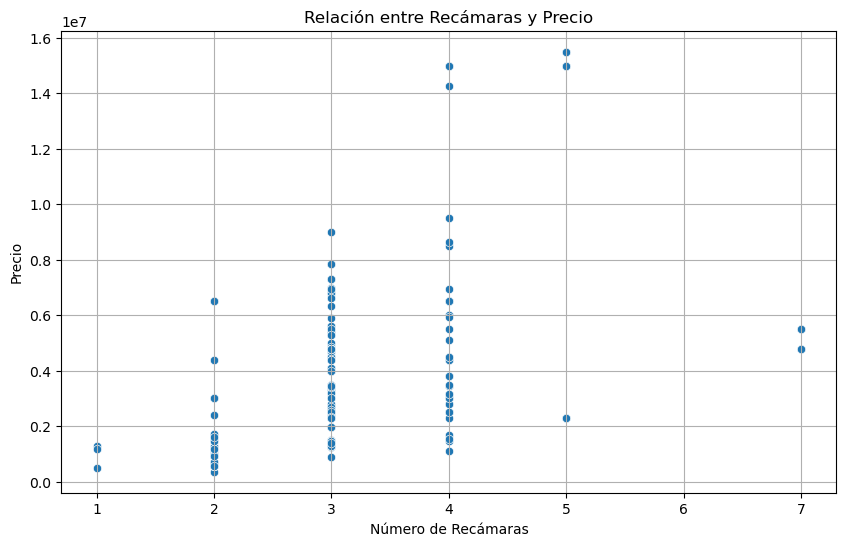

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Recamaras vs Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Recamaras', y='Precio')
plt.title('Relación entre Recámaras y Precio')
plt.xlabel('Número de Recámaras')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

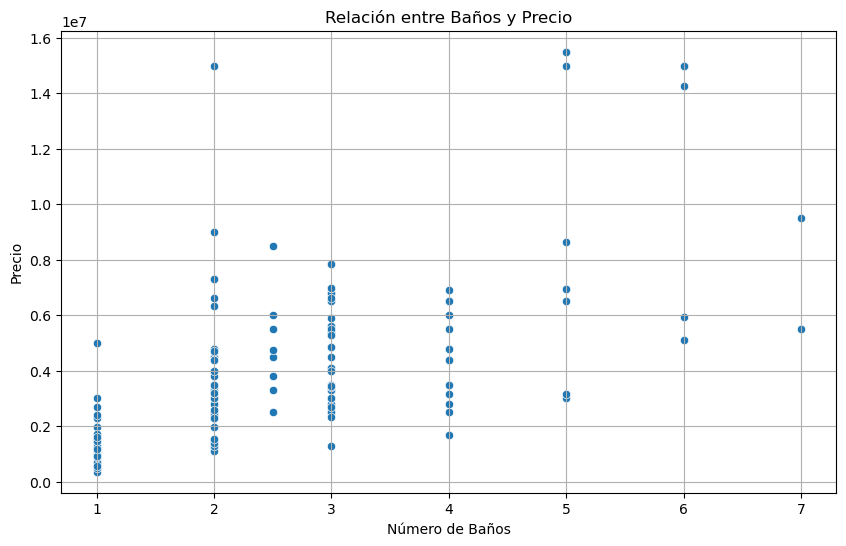

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Baños vs Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Baños', y='Precio')
plt.title('Relación entre Baños y Precio')
plt.xlabel('Número de Baños')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

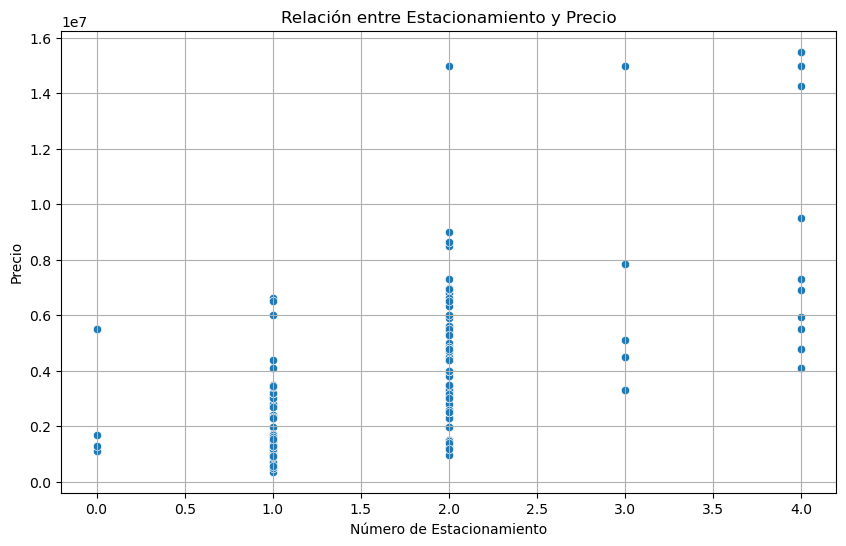

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Estacionamiento vs Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Estacionamiento', y='Precio')
plt.title('Relación entre Estacionamiento y Precio')
plt.xlabel('Número de Estacionamiento')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

# Task
Train a Random Forest regression model using 'Construcción', 'Terreno', 'Recamaras', 'Baños', and 'Estacionamiento' as features to predict 'Precio', then evaluate the model's performance.

## Preparar datos para el modelo

### Subtask:
Seleccionar las características (Construcción, Terreno, Recamaras, Baños, Estacionamiento) y la variable objetivo (Precio) del DataFrame, y convertirlas a formatos numéricos adecuados si es necesario. Manejar cualquier valor nulo si los hay.


**Reasoning**:
I will select the specified feature columns as `X` and the target variable as `y`. Then, I will check for missing values in both `X` and `y` and handle them by dropping rows with missing values, as suggested in the instructions.



In [11]:
feature_cols = ['Construcción', 'Terreno', 'Recamaras', 'Baños', 'Estacionamiento']
X = df[feature_cols]
y = df['Precio']

# Check for missing values in X and y
print("Missing values in features (X):")
print(X.isnull().sum())
print("\nMissing values in target (y):")
print(y.isnull().sum())

# Handle missing values by dropping rows with any missing values in X or y
data = pd.concat([X, y], axis=1)
data_cleaned = data.dropna()

X = data_cleaned[feature_cols]
y = data_cleaned['Precio']

print("\nShape of X after handling missing values:", X.shape)
print("Shape of y after handling missing values:", y.shape)

Missing values in features (X):
Construcción       0
Terreno            0
Recamaras          0
Baños              0
Estacionamiento    0
dtype: int64

Missing values in target (y):
0

Shape of X after handling missing values: (186, 5)
Shape of y after handling missing values: (186,)


## Dividir datos en conjuntos de entrenamiento y prueba

### Subtask:
Dividir el conjunto de datos preparado en un conjunto de entrenamiento y un conjunto de prueba para poder evaluar el modelo de forma imparcial. Utilizar una división del 80/20 o 70/30 es una buena práctica.


**Reasoning**:
I need to import `train_test_split` from `sklearn.model_selection` to divide the data into training and testing sets as per the instructions.



In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (148, 5)
Shape of X_test: (38, 5)
Shape of y_train: (148,)
Shape of y_test: (38,)


## Entrenar el modelo de regresión Random Forest

### Subtask:
Inicializar y entrenar un modelo RandomForestRegressor de scikit-learn con el conjunto de datos de entrenamiento.


**Reasoning**:
I need to import the RandomForestRegressor, instantiate it, and then train the model using the training data (X_train, y_train).



In [13]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model
# Using n_estimators=100 and random_state=42 for reproducibility
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with the training data
model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


## Evaluar el modelo

### Subtask:
Realizar predicciones sobre el conjunto de prueba y calcular métricas de evaluación como el Error Absoluto Medio (MAE), el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2) para entender el rendimiento del modelo.


**Reasoning**:
I need to make predictions on the test set (`X_test`) using the trained Random Forest model and then calculate MAE, MSE, and R-squared to evaluate its performance. First, I'll import the necessary metrics from `sklearn.metrics`.



In [14]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R^2): {r2:.2f}")

Mean Absolute Error (MAE): 791,651.92
Mean Absolute Percentage Error (MAPE): 26.29%
R-squared (R^2): 0.84


## Final Task

### Subtask:
Presentar los resultados de la evaluación del modelo de regresión Random Forest.


## Summary:

### Data Analysis Key Findings
*   The dataset, comprising 186 records, was successfully prepared, selecting 'Construcción', 'Terreno', 'Recamaras', 'Baños', and 'Estacionamiento' as features and 'Precio' as the target variable. No missing values were found in these selected columns.
*   The data was split into training and testing sets with an 80/20 ratio, resulting in 148 samples for training and 38 samples for testing.
*   A Random Forest Regressor model was trained using the training data with `n_estimators=100` and `random_state=42`.
*   The model's performance on the test set was evaluated, yielding the following metrics:
    *   Mean Absolute Error (MAE): 791651.92
    *   Mean Squared Error (MSE): 2183933594184.54
    *   R-squared (R^2): 0.84, indicating that approximately 84% of the variance in the 'Precio' can be explained by the features in the model.

### Insights or Next Steps
*   The R-squared value of 0.84 suggests a good fit, indicating that the chosen features explain a significant portion of the variability in 'Precio'. Further analysis could involve investigating feature importance to understand which factors most influence property prices.
*   Given the MAE of 791651.92, it's advisable to check the scale of the 'Precio' variable. If this error is considered high in context, exploring hyperparameter tuning (e.g., `max_depth`, `min_samples_leaf`) or trying other regression models could potentially improve accuracy.


In [15]:
#save the trained model to a file
import os
import joblib
model_filename = 'models/random_forest_regressor_model.joblib'
os.makedirs(os.path.dirname(model_filename), exist_ok=True)
joblib.dump(model, model_filename)

['models/random_forest_regressor_model.joblib']

In [16]:
import joblib
import pandas as pd

# Load the trained model from the file
model_filename = 'models/random_forest_regressor_model.joblib'
loaded_model = joblib.load(model_filename)

print(f"El modelo ha sido cargado exitosamente desde '{model_filename}'")

El modelo ha sido cargado exitosamente desde 'models/random_forest_regressor_model.joblib'


In [17]:
import pandas as pd

# Create new data for prediction. Make sure the column names match the features used for training.
# Example: Construcción=150, Terreno=100, Recamaras=3, Baños=2, Estacionamiento=1
new_data = pd.DataFrame({
    'Construcción': [204.0],
    'Terreno': [144.00],
    'Recamaras': [3],
    'Baños': [2.5],
    'Estacionamiento': [2]
})

# Make a prediction using the loaded model
predicted_price = loaded_model.predict(new_data)

print(f"Datos de entrada para la predicción:\n{new_data}")
print(f"El precio predicho para esta vivienda es: ${predicted_price[0]:,.2f}")

Datos de entrada para la predicción:
   Construcción  Terreno  Recamaras  Baños  Estacionamiento
0         204.0    144.0          3    2.5                2
El precio predicho para esta vivienda es: $3,236,596.86


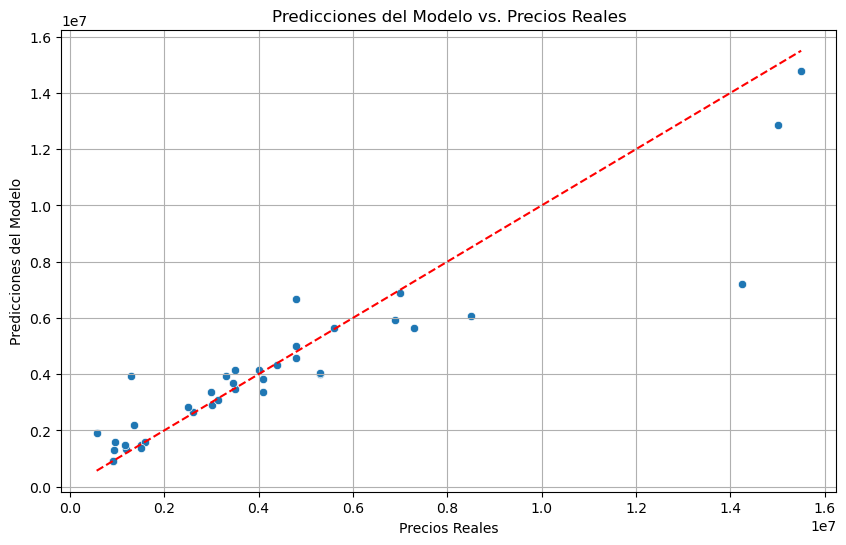

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicciones del Modelo vs. Precios Reales')
plt.xlabel('Precios Reales')
plt.ylabel('Predicciones del Modelo')
plt.grid(True)
plt.show()